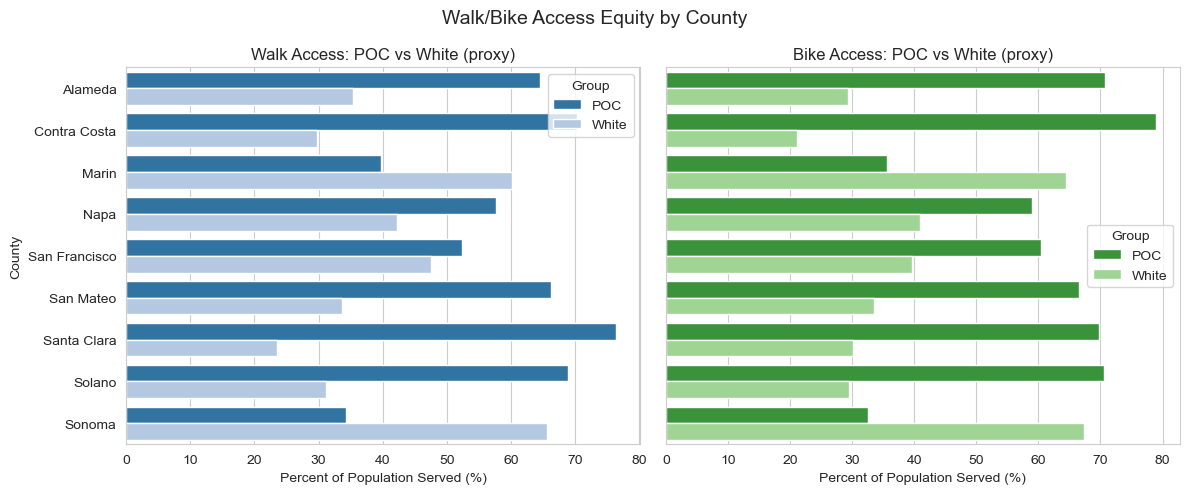

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv("Shoreline-Access-Pts_v2-1-attribute-table.csv")

#Select walk/bike only
df = df[df["Service_Type"].isin(["Walk", "Bike"])]

#County × mode totals
g = df.groupby(["County_Name", "Service_Type"], as_index=False).agg(
    total_pop=("SUM_Estimated_Total_Population", "sum"),
    poc_pop=("SUM_Estimated_People_of_Color", "sum")
)

#Percent shares
g["POC"] = g["poc_pop"] / g["total_pop"] * 100
g["White"] = 100 - g["POC"]

# Long format for seaborn
long_df = pd.melt(
    g,
    id_vars=["County_Name", "Service_Type"],
    value_vars=["POC", "White"],
    var_name="Group",
    value_name="Percent"
)

#Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, mode in zip(axes, ["Walk", "Bike"]):
    subset = long_df[long_df["Service_Type"] == mode]
    colors = ["#1f77b4", "#aec7e8"] if mode == "Walk" else ["#2ca02c", "#98df8a"]
    sns.barplot(
        data=subset,
        y="County_Name",
        x="Percent",
        hue="Group",
        palette=colors,
        ax=ax
    )
    ax.set_title(f"{mode} Access: POC vs White (proxy)")
    ax.set_xlabel("Percent of Population Served (%)")
    ax.set_ylabel("County")

plt.suptitle("Walk/Bike Access Equity by County", fontsize=14)
plt.tight_layout()
plt.show()
